<a href="https://www.peqnp.com"><img border="0" alt="PEQNP" src="https://raw.githubusercontent.com/maxtuno/SATX/main/SAT-X.jpg" width="640" height="400">

# SAT-X 
## [![Downloads](https://pepy.tech/badge/satx)](https://pepy.tech/project/satx) 
### The constraint modeling language for SAT solvers

SAT-X is a language for constrained optimization and decision problems over positive integers, that work with any SAT Competition standard SAT solver. Is based on Python, and is ase to learn and easy to use with all technologies associated to this language.

# Some excelent SAT Solvers

1- https://github.com/maxtuno/SLIME (standalone and cloud [MPI] - Oscar Riveros)

2- https://github.com/arminbiere/kissat (The Kissat SAT Solver - Armin Biere)

3- https://github.com/maxtuno/MiniSat (MiniSat 2.2.0 with DRUP proof, CMake and StarExec Ready. -  Niklas Een, Niklas Sorensson)

4- https://github.com/maxtuno/blue (A Powerful SAT Solver for Java - Oscar Riveros)

5- Any SAT Solver with the SAT Competition standars. (http://www.satcompetition.org)

# INSTALLATION
```python
pip install SATX
```

In [1]:
!pip install SATX --upgrade --force

  Created wheel for SATX: filename=SATX-0.3.3-py3-none-any.whl size=19260 sha256=1f0141ab883116da9bfabb4cbe00f41ac4364cb52a0df0321fce6682bf20f62c
  Stored in directory: /root/.cache/pip/wheels/59/a2/62/5dfa22aa1932f77e9368ff45b26908343ad7576cab73d023b4
Successfully built SATX


# INTRODUCION
On SAT-X all elements are integers, the relations are at bit level or arithmetic level. All integers live on $\mathbb{N}_{2 ^ {bits} - 1}$ and always positives, i.e. for two integer $(x, y)$ the operation, $(x - y)$ take all possibilities such that $x - y >= 0$.

# SUPPORTED OPERATIONS
$+$, $-$, $*$, $/$, $**$, $abs$, $powmod$, $\%$, $\&$, $|$, $^$, $==$, $=$, $<$, $<=$, $>$, $>=$

# FIND ALL SOLUTIONS TO $2^n-7=x^2$

Ref: http://www.artofproblemsolving.com/Forum/viewtopic.php?t=66245

In [ ]:
import satx

satx.engine(32, cnf_path='tmp.cnf')

_2 = satx.constant(2)
n = satx.integer()
x = satx.integer()

assert _2 ** n - 7 == x ** 2

while satx.satisfy('slime'):
    print(n, x)

5 5
4 3
7 11
15 181
3 1


SOLVE IN POSITIVE INTEGERS THE FOLLOWING EQUATION: $n^3 − 5n + 10 = 2^k$.

Ref: http://www.artofproblemsolving.com/Forum/viewtopic.php?t=103239

tip: avoid the negative signs

In [ ]:
import satx

satx.engine(16, cnf_path='tmp.cnf')

_2 = satx.constant(2)

n = satx.integer()
k = satx.integer()

assert n ** 3 + 10 == _2 ** k + 5 * n

while satx.satisfy('slime'):
    print(n, k)

2 3


# FIND ALL POSITIVE INTEGER SOLUTIONS TO $a^{2}=b^{3}+1$

Ref: http://www.artofproblemsolving.com/Forum/viewtopic.php?t=103239

In [ ]:
import satx

satx.engine(16, cnf_path='tmp.cnf')

a = satx.integer()
b = satx.integer()

assert a ** 2 == b ** 3 + 1

while satx.satisfy('slime'):
    print(a, b)

1 0
3 2


# FIND ALL POSITIVE INTEGER SOLUTIONS TO  $x,y$: $3^x - 1 == y2^x + 1$

ref: http://www.artofproblemsolving.com/Forum/viewtopic.php?t=31947

In [ ]:
import satx

satx.engine(32, cnf_path='tmp.cnf')

_2 = satx.constant(2)
_3 = satx.constant(3)

x = satx.integer()
y = satx.integer()

assert _3 ** x == y * _2 ** x + 1

while satx.satisfy('slime'):
    print(x, y)

0 0
2 2
4 5
1 1


# INTEGER FACTORIZATION
In number theory, integer factorization is the decomposition of a composite number into a product of smaller integers. If these factors are further restricted to prime numbers, the process is called prime factorization.

In [ ]:
import satx

rsa = 3007

satx.engine(rsa.bit_length(), cnf_path='tmp.cnf')

p = satx.integer()
q = satx.integer()

assert p * q == rsa

while satx.satisfy('slime'):
    print(p, q)

3007 1
97 31
1 3007
31 97


# PALINDROMIC NUMBERS (Bits Level)

In [ ]:
import numpy as np
import satx

satx.engine(10, cnf_path='tmp.cnf')

x = satx.integer()

# without "copy" for inplace reverse of bits
assert x == x.reverse(copy=True)

while satx.satisfy('slime'):
    print(x, np.binary_repr(x.value, satx.bits()))

0 0000000000
132 0010000100
72 0001001000
258 0100000010
513 1000000001
48 0000110000
204 0011001100
771 1100000011
120 0001111000
390 0110000110
561 1000110001
180 0010110100
330 0101001010
645 1010000101
585 1001001001
306 0100110010
462 0111001110
693 1010110101
633 1001111001
819 1100110011
252 0011111100
843 1101001011
438 0110110110
717 1011001101
378 0101111010
903 1110000111
975 1111001111
510 0111111110
765 1011111101
891 1101111011
951 1110110111
1023 1111111111


# XOR Problem

The XOr, or “exclusive or”, problem is a classic problem in ANN research. It is the problem of using a neural network to predict the outputs of XOr logic gates given two binary inputs. An XOr function should return a true value if the two inputs are not equal and a false value if they are equal.

In [ ]:
import satx

x = [[0, 0], [0, 1], [1, 0], [1, 1]]
y = [0, 1, 1, 0]

n, m = len(x), len(x[0])

satx.engine(10, cnf_path='tmp.cnf')

w = satx.matrix(dimensions=(n, m))
b = satx.vector(size=n)

for i in range(n):
    assert y[i] == satx.dot(x[i], w[i]) + b[i]

if satx.satisfy('slime'):
    for i in range(n):
        print(x[i], satx.dot(x[i], w[i]) + b[i])
else:
    print('Infeasible ...')

[0, 0] 0
[0, 1] 1
[1, 0] 1
[1, 1] 0


# ABSOLUTE VALUES

In [ ]:
import satx

satx.engine(4, cnf_path='tmp.cnf')

x = satx.integer()
y = satx.integer()

assert abs(x - y) == 1

assert x != satx.oo()
assert y != satx.oo()

while satx.satisfy('slime'):
    print(x, y, x - y, abs(x - y))

8 9 -1 1
12 13 -1 1
4 5 -1 1
10 9 1 1
2 1 1 1
14 13 1 1
6 5 1 1
9 8 1 1
13 12 1 1
5 4 1 1
12 11 1 1
4 3 1 1
8 7 1 1
10 11 -1 1
11 10 1 1
2 3 -1 1
14 15 -1 1
6 7 -1 1
3 2 1 1
15 14 1 1
7 6 1 1
7 8 -1 1
1 2 -1 1
5 6 -1 1
11 12 -1 1
3 4 -1 1
9 10 -1 1
13 14 -1 1


# CENTROID

3 3


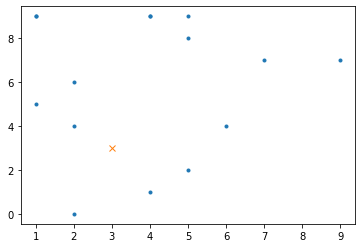

In [ ]:
import numpy as np
import satx
import matplotlib.pyplot as plt

n = 15

data = np.random.randint(0, 10, size=(n, 2))

opt = 1
while True:
    satx.engine(10, cnf_path='tmp.cnf')

    x = satx.integer()
    y = satx.integer()

    assert sum(abs(xy[0] - x) + abs(xy[1] - y) for xy in data) < opt
    
    assert x != satx.oo()
    assert y != satx.oo()

    if satx.satisfy('slime'):        
        print(x, y)
        a, b = zip(*data)
        plt.plot(a, b, '.')
        plt.plot(x, y, 'x')
        plt.show()
        break
    else:
        opt += 1

# FERMAT'S FACTORIZATION METHOD

Note: when there is a negative number in the model, increment the bits by 1.

In [ ]:
import satx

rsa = 3007

satx.engine(rsa.bit_length() + 1, cnf_path='tmp.cnf')

p = satx.integer()
q = satx.integer()

assert p ** 2 - q ** 2 == rsa
assert q < p

if satx.satisfy('slime'):
    print(p, q, p + q, p - q)
else:
    print('Is Prime!')

64 33 97 31


# EXPONENTIAL DIOPHANTINE EQUATIONS


In [ ]:
import satx

satx.engine(10, cnf_path='tmp.cnf')

x = satx.integer()
y = satx.integer()
z = satx.integer()

satx.apply_single([x, y, z], lambda t: t != 0)

assert x ** y == z

while satx.satisfy('slime'):
    print(x, y, z)

1 1 1
2 2 4
2 1 2
2 5 32
2 3 8
1 2 1
1 4 1
1 3 1
1 5 1
2 4 16
3 5 243
3 4 81
3 2 9
3 1 3
3 3 27


# ON THE DIOPHANTINE EQUATION $x^2 + c = 3^n$ WITH $x, c, n > 1$

In [ ]:
import satx

n = 32

satx.engine(n.bit_length(), cnf_path='tmp.cnf')

_3 = satx.constant(3)
n = satx.integer()
x = satx.integer()
c = satx.integer()

assert x ** 2 + c == _3 ** n
assert x > 1
assert c > 1
assert n > 1

if satx.satisfy('slime'):
    print(n, x, c)
else:
    print('Infeasible for bit range...')

3 4 11


# FACTORIALS

In [ ]:
import math
import satx

satx.engine(32, cnf_path='tmp.cnf')

x = satx.integer()

satx.factorial(x) == math.factorial(10)

if satx.satisfy('slime'):
    print(x)
else:
    print('Need more bits!')

10


# $\Sigma$

In [ ]:
import satx

satx.engine(16, cnf_path='tmp.cnf')

x = satx.integer()
n = satx.integer()

satx.sigma(lambda k: k ** 2, 1, n) == x

while satx.satisfy('slime'):
    print(x, n, sum(k ** 2 for k in range(1, n.value + 1)))


650 12 650
1 1 1
5 2 5
14 3 14
506 11 506
285 9 285
819 13 819
1015 14 1015
385 10 385
55 5 55
91 6 91
204 8 204
0 0 0
30 4 30
140 7 140


# $\Pi$

In [ ]:
import functools
import operator
import math
import satx

satx.engine(32, cnf_path='tmp.cnf')

x = satx.integer()
n = satx.integer()

satx.pi(lambda k: k ** 2, 1, n) == x
assert 0 < x <= 2 ** math.log(satx.oo()) # limit the CNF overflow
assert n > 0

while satx.satisfy('slime'):
    print(x, n, functools.reduce(operator.mul, (k ** 2 for k in range(1, n.value + 1))))

4 2 4
576 4 576
518400 6 518400
14400 5 14400
1 1 1
36 3 36


# SAT-X VS FIBONACCI NUMBERS | N VS TIME

2 1
3 2
4 3
5 5
6 8
7 13
8 21
9 34
10 55
11 89
12 144
13 233
14 377
15 610
16 987
17 1597
18 2584
19 4181
20 6765
21 10946
22 17711
23 28657
24 46368
25 75025
26 121393
27 196418
28 317811
29 514229
30 832040
31 1346269
32 2178309
33 3524578
34 5702887
35 9227465
36 14930352
37 24157817
38 39088169
39 63245986
40 102334155
41 165580141
42 267914296
43 433494437
44 701408733
45 1134903170
46 1836311903
47 2971215073
48 4807526976
49 7778742049
50 12586269025
51 20365011074
52 32951280099
53 53316291173
54 86267571272
55 139583862445
56 225851433717
57 365435296162
58 591286729879
59 956722026041
60 1548008755920
61 2504730781961
62 4052739537881
63 6557470319842
64 10610209857723
65 17167680177565
66 27777890035288
67 44945570212853
68 72723460248141
69 117669030460994
70 190392490709135
71 308061521170129
72 498454011879264
73 806515533049393
74 1304969544928657
75 2111485077978050
76 3416454622906707
77 5527939700884757
78 8944394323791464
79 14472334024676221
80 23416728348467685
81 

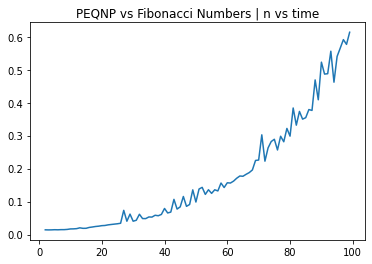

In [ ]:
import time
import satx
import matplotlib.pyplot as plt

ns, ts = [], []
for n in range(2, 100):

    satx.engine(n, cnf_path='tmp.cnf')

    x = satx.vector(size=n + 1)

    assert x[0] == 0
    assert x[1] == 1
    for i in range(2, n + 1):
        assert x[i - 1] + x[i - 2] == x[i]

    ini = time.time()
    if satx.satisfy('slime'):
        print(n, x[n])
    else:
        print('Infeasible ...')
    end = time.time()
    ns.append(n)
    ts.append(end - ini)

plt.title('SAT-X vs Fibonacci Numbers | n vs time')
plt.plot(ns, ts)
plt.show()

# TENSORS

Tensors object are the most advanced concept behind SAT-X, integers are tensors, work like integers, but their bits act like an multidimensional matrix of lambda functions.

Note: [[*]] for acces to lambda (bit) functions.

In [ ]:
import satx

satx.engine(10, cnf_path='tmp.cnf')

x = satx.tensor(dimensions=(4))
y = satx.tensor(dimensions=(2, 2))

assert x + y == 10
assert x[[0]](0, 1) == 1
assert y[[0, 0]](0, 1) == 1

while satx.satisfy('slime'):
    print(x, y, x.binary, y.binary)

1 9 [True, False, False, False] [[True, False], [False, True]]
9 1 [True, False, False, True] [[True, False], [False, False]]
5 5 [True, False, True, False] [[True, False], [True, False]]
7 3 [True, True, True, False] [[True, True], [False, False]]
3 7 [True, True, False, False] [[True, True], [True, False]]


In [ ]:
import numpy as np
import satx

n = 2

satx.engine(4, cnf_path='tmp.cnf')

x = satx.tensor(dimensions=(n, n))
a = satx.integer()
b = satx.integer()

assert sum(x[[i, j]](a ** 2 - b ** 3, a ** 3 - b ** 2) for i in range(n) for j in range(n)) == 0

while satx.satisfy('slime'):
    print(a, b)
    print(np.vectorize(int)(x.binary))
    print()

0 0
[[0 0]
 [0 0]]

0 0
[[0 1]
 [0 0]]

0 0
[[1 0]
 [0 0]]

0 0
[[0 0]
 [1 1]]

0 0
[[0 0]
 [1 0]]

0 0
[[0 0]
 [0 1]]

0 0
[[1 0]
 [0 1]]

0 0
[[1 0]
 [1 0]]

0 0
[[1 1]
 [0 0]]

0 0
[[1 1]
 [0 1]]

0 0
[[1 1]
 [1 0]]

0 0
[[1 1]
 [1 1]]

0 0
[[0 1]
 [1 0]]

0 0
[[0 1]
 [1 1]]

0 0
[[1 0]
 [1 1]]

0 0
[[0 1]
 [0 1]]

1 1
[[0 0]
 [0 0]]

1 1
[[1 1]
 [1 0]]

1 1
[[0 0]
 [0 1]]

1 1
[[1 0]
 [1 0]]

1 1
[[0 1]
 [0 0]]

1 1
[[1 1]
 [0 0]]

1 1
[[0 1]
 [0 1]]

1 1
[[0 1]
 [1 0]]

1 1
[[1 1]
 [0 1]]

1 1
[[1 0]
 [0 0]]

1 1
[[1 1]
 [1 1]]

1 1
[[1 0]
 [0 1]]

1 1
[[1 0]
 [1 1]]

1 1
[[0 1]
 [1 1]]

1 1
[[0 0]
 [1 1]]

1 1
[[0 0]
 [1 0]]



# RSA FACTORIZATION WITH TENSORS

In [ ]:
import satx

rsa = 3007

satx.engine(rsa.bit_length(), cnf_path='tmp.cnf')

p = satx.tensor(dimensions=(satx.bits()))
q = satx.tensor(dimensions=(satx.bits()))

assert p * q == rsa
assert p[[0]](0, 1) == 1
assert q[[0]](0, 1) == 1
assert sum(p[[i]](0, 1) for i in range(satx.bits() // 2 + 1, satx.bits())) == 0
assert sum(q[[i]](0, 1) for i in range(satx.bits() // 2, satx.bits())) == 0

if satx.satisfy('slime'):
    print(p, q)
else:
    print('Is Prime!')

97 31


# SAT REFORMULATION WITH TENSORS

In [ ]:
import functools
import operator
import sys

import satx


n, m, sat = 10, 24, [[9, -5, 10, -6, 3],
                     [6, 8],
                     [8, 4],
                     [-10, 5],
                     [-9, 8],
                     [-9, -3],
                     [-2, 5],
                     [6, 4],
                     [-2, -1],
                     [7, -2],
                     [-9, 4],
                     [-1, -10],
                     [-3, 4],
                     [7, 5],
                     [6, -3],
                     [-10, 7],
                     [-1, 7],
                     [8, -3],
                     [-2, -10],
                     [-1, 5],
                     [-7, 1, 9, -6, 3],
                     [-9, 6],
                     [-8, 10, -5, -4, 2],
                     [-4, -7, 1, -8, 2]]


if __name__ == '__main__':
    
    satx.engine(bits=1, cnf_path='tmp.cnf')
    
    x = satx.tensor(dimensions=(n,))
    
    assert functools.reduce(operator.iand, (functools.reduce(operator.ior, (x[[abs(lit) - 1]](lit < 0, lit > 0) for lit in cls)) for cls in sat)) == 1
    
    if satx.satisfy('slime'):
        print('SAT')
        print(' '.join(map(str, [(i + 1) if b else -(i + 1) for i, b in enumerate(x.binary)])) + ' 0')
    else:
        print('')

SAT
-1 2 -3 4 5 -6 7 8 -9 -10 0


# SUM SUBSET PROBLEM WITH TENSORS

In [ ]:
import numpy as np
import satx

universe = np.random.randint(1, 2 ** 16, size=100)
t = np.random.randint(min(universe), sum(universe))

satx.engine(t.bit_length(), cnf_path='tmp.cnf')

x = satx.tensor(dimensions=(len(universe)))

assert sum(x[[i]](0, universe[i]) for i in range(len(universe))) == t

if satx.satisfy('slime'):
    sub = [universe[i] for i in range(len(universe)) if x.binary[i]]
    print(t, sum(sub), sub)
else:
    print('Infeasible ...')

499751 499751 [24973, 64062, 53269, 15271, 12933, 33047, 6702, 3432, 8744, 33565, 11760, 3393, 41702, 4396, 1117, 5956, 251, 20783, 41793, 33927, 21378, 19539, 21515, 2587, 1797, 11859]


# MULTISET RECONSTRUCTION BY DIFFERENCES

Given a sorted multiset, their differences and one tip (an element and position for only one arbitrary element), is possible recovery the original multiset?

In [ ]:
import time
import random
import satx


def generator(n, max_val):
    return sorted([random.randint(1, max_val) for _ in range(n)])


def differences(lst):
    return [abs(lst[i] - lst[i - 1]) for i in range(1, len(lst))]


# 100 tests
for n in range(1, 10):

    m = random.randint(1, n ** 2)

    original = generator(n, m)
    diffs = differences(original)

    print('N, M         : {}, {}'.format(n, m))
    print('DIFFERENCES  : {}'.format(diffs))
    print('ORIGINAL     : {}'.format(original))

    # only one tip
    ith = random.choice(range(n))
    tip = original[ith]

    # init timer
    ini = time.time()

    # Empirical bits necessarily to solve the problem.
    satx.engine(sum(diffs).bit_length() + 4, cnf_path='tmp.cnf')

    # Declare a n-vector of integer variables to store the solution.
    x = satx.vector(size=n)

    # The tip is on x at index ith
    assert tip == satx.index(ith, x)

    # The i-th element of the instance is the absolute difference of two consecutive elements
    for i in range(n - 1):
        assert x[i] <= x[i + 1]
        assert satx.index(i, diffs) == x[i + 1] - x[i]

    # Solve the problem for only one solution
    # Turbo parameter is a destructive simplification
    # Solve with all power os SLIME SAT Solver but only for the fist solution.
    if satx.satisfy('slime'):
        o = [abs(x[i + 1] - x[i]) for i in range(n - 1)]
        c = 100 * len(set(map(int, x)).intersection(set(original))) / len(set(original))
        print('SOLVED       : {}'.format(x))
        print('COINCIDENCES : {}%'.format(c))
        if o == diffs:
            print('OK! - {}s'.format(time.time() - ini))
        else:
            print('NOK! - {}s'.format(time.time() - ini))
            raise Exception('ERROR!')
        if c != 100:
            raise Exception('Hypothesis Fail - 100%')

N, M         : 1, 1
DIFFERENCES  : []
ORIGINAL     : [1]
SOLVED       : [1]
COINCIDENCES : 100.0%
OK! - 0.016922950744628906s
N, M         : 2, 3
DIFFERENCES  : [1]
ORIGINAL     : [2, 3]
SOLVED       : [2, 3]
COINCIDENCES : 100.0%
OK! - 0.02008986473083496s
N, M         : 3, 9
DIFFERENCES  : [1, 5]
ORIGINAL     : [2, 3, 8]
SOLVED       : [2, 3, 8]
COINCIDENCES : 100.0%
OK! - 0.03384590148925781s
N, M         : 4, 15
DIFFERENCES  : [4, 1, 4]
ORIGINAL     : [5, 9, 10, 14]
SOLVED       : [5, 9, 10, 14]
COINCIDENCES : 100.0%
OK! - 0.049759864807128906s
N, M         : 5, 11
DIFFERENCES  : [1, 4, 0, 1]
ORIGINAL     : [3, 4, 8, 8, 9]
SOLVED       : [3, 4, 8, 8, 9]
COINCIDENCES : 100.0%
OK! - 0.056195974349975586s
N, M         : 6, 18
DIFFERENCES  : [5, 5, 2, 2, 3]
ORIGINAL     : [1, 6, 11, 13, 15, 18]
SOLVED       : [1, 6, 11, 13, 15, 18]
COINCIDENCES : 100.0%
OK! - 0.09223389625549316s
N, M         : 7, 7
DIFFERENCES  : [1, 1, 0, 3, 1, 0]
ORIGINAL     : [1, 2, 3, 3, 6, 7, 7]
SOLVED       : [

# DIOPHANTINE EQUATIONS

https://en.wikipedia.org/wiki/Diophantine_equation

### Let be $x, y \in \mathbb{N} \vert x^3 - x + 1 = y^2$

In [ ]:
import satx

satx.engine(10, cnf_path='tmp.cnf')

x = satx.integer()
y = satx.integer()

assert x ** 3 - x + 1 == y ** 2

assert x != 0
assert y != 0

while satx.satisfy('slime'):
    print('{0} ** 3 - {0} + 1, {1} ** 2'.format(x, y))

1 ** 3 - 1 + 1, 1 ** 2
5 ** 3 - 5 + 1, 11 ** 2
3 ** 3 - 3 + 1, 5 ** 2


### Let be $x, y \in \mathbb{Q} \vert x^3 + xy = y^2$

In [ ]:
import satx

satx.engine(10, cnf_path='tmp.cnf')

x = satx.rational()
y = satx.rational()

assert x ** 3 + x * y == y ** 2
assert x != 0
assert y != 0

while satx.satisfy('slime'):
    print('{0} ** 3 + {0} * {1} == {1} ** 2'.format(x, y))

(2 / 1) ** 3 + (2 / 1) * (4 / 1) == (4 / 1) ** 2
(4 / 2) ** 3 + (4 / 2) * (8 / 2) == (8 / 2) ** 2
(4 / 2) ** 3 + (4 / 2) * (4 / 1) == (4 / 1) ** 2
(6 / 1) ** 3 + (6 / 1) * (18 / 1) == (18 / 1) ** 2


# Vectors

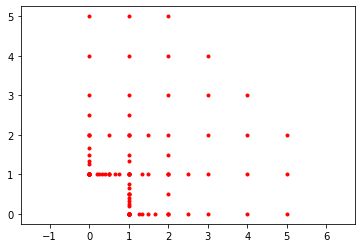

In [ ]:
import numpy as np
import satx
import matplotlib.pyplot as plt

dim = 2

satx.engine(5, cnf_path='tmp.cnf')

ps = satx.vector(size=dim, is_rational=True)

assert sum([p ** dim for p in ps]) <= 1

dots = []
while satx.satisfy('slime'):
    dots.append(np.vectorize(float)(ps))

x, y = zip(*dots)
plt.axis('equal')
plt.plot(x, y, 'r.')
plt.show()

# NP-COMPLETE PROBLEMS

NP-Complete problem, any of a class of computational problems for which no efficient solution algorithm has been found. Many significant computer - science problems belong to this class—e.g., the traveling salesman problem, satisfiability problems, and graph - covering problems.

https://en.wikipedia.org/wiki/NP-completeness

# SATISFIABILITY

Study of boolean functions generally is concerned with the set of truth assignments(assignments of 0 or 1 to each of the variables) that make the function true.

https://en.wikipedia.org/wiki/Boolean_satisfiability_problem

In [ ]:
import functools
import operator

import satx

n, m, sat = 10, 24, [[9, -5, 10, -6, 3],
                     [6, 8],
                     [8, 4],
                     [-10, 5],
                     [-9, 8],
                     [-9, -3],
                     [-2, 5],
                     [6, 4],
                     [-2, -1],
                     [7, -2],
                     [-9, 4],
                     [-1, -10],
                     [-3, 4],
                     [7, 5],
                     [6, -3],
                     [-10, 7],
                     [-1, 7],
                     [8, -3],
                     [-2, -10],
                     [-1, 5],
                     [-7, 1, 9, -6, 3],
                     [-9, 6],
                     [-8, 10, -5, -4, 2],
                     [-4, -7, 1, -8, 2]]

satx.engine(bits=1, cnf_path='tmp.cnf')
x = satx.tensor(dimensions=(n,))
assert functools.reduce(operator.iand, (functools.reduce(operator.ior, (x[[abs(lit) - 1]](lit < 0, lit > 0) for lit in cls)) for cls in sat)) == 1
if satx.satisfy('slime'):
    print('SAT')
    print(' '.join(map(str, [(i + 1) if b else -(i + 1) for i, b in enumerate(x.binary)])) + ' 0')
else:
    print('UNSAT')

SAT
-1 2 -3 4 5 -6 7 8 -9 -10 0


# k-CLIQUE

Input: Graph $G$, positive integer $k$

Property: $G$ has a set of mutually adjacent nodes.

https://en.wikipedia.org/wiki/Clique_problem

In [ ]:
import satx

# Ths bits of the clique to search
k = 3

# Get the graph, and the dimension for the graph
n, matrix = 5, [(1, 0), (0, 2), (1, 4), (2, 1), (4, 2), (3, 2)]

# Ensure the problem can be represented
satx.engine(bits=k.bit_length(), cnf_path='tmp.cnf')

# Declare an integer of n-bits
bits = satx.integer(bits=n)

# The bits integer have "bits"-active bits, i.e, the clique has "bits"-elements
assert sum(satx.switch(bits, i) for i in range(n)) == k

# This entangles all elements that are joined together
for i in range(n - 1):
    for j in range(i + 1, n):
        if (i, j) not in matrix and (j, i) not in matrix:
            assert satx.switch(bits, i) + satx.switch(bits, j) <= 1

if satx.satisfy('slime'):
    print(k)
    print(' '.join([str(i) for i in range(n) if not bits.binary[i]]))
else:
    print('Infeasible ...')

3
1 2 4


# VERTEX COVER

In the mathematical discipline of graph theory, a vertex cover (sometimes node cover) of a graph is a set of vertices that includes at least one endpoint of every edge of the graph. The problem of finding a minimum vertex cover is a classical optimization problem in computer science and is a typical example of an NP-hard optimization problem that has an approximation algorithm. Its decision version, the vertex cover problem, was one of Karp's 21 NP-complete problems and is therefore a classical NP-complete problem in computational complexity theory. Furthermore, the vertex cover problem is fixed-parameter tractable and a central problem in parameterized complexity theory.

https://en.wikipedia.org/wiki/Vertex_cover

In [ ]:
import satx

# Get the graph and dimension, and the bits of the cover.
n, graph, vertex, k = 5, [(1, 0), (0, 2), (1, 4), (2, 1), (4, 2), (3, 2)], [0, 1, 2, 3, 4], 3

# Ensure the problem can be represented
satx.engine(bits=n.bit_length() + 1, cnf_path='tmp.cnf')

# An integer with n-bits to store the indexes for the cover
index = satx.integer(bits=n)

# This entangled the all possible covers
for i, j in graph:
    assert satx.switch(index, vertex.index(i), neg=True) + satx.switch(index, vertex.index(j), neg=True) >= 1

# Ensure the cover has bits k
assert sum(satx.switch(index, vertex.index(i), neg=True) for i in vertex) == k

if satx.satisfy('slime'):
    opt = sum(index.binary)
    print('p bits {}'.format(opt))
    print(' '.join([str(vertex[i]) for i in range(n) if index.binary[i]]))
else:
    print('Infeasible ...')

p bits 3
1 2 4


# MULTIDIMENSIONAL LATIN SQUARES

In combinatorics and in experimental design, a Latin square is an n × n array filled with n different symbols, each occurring exactly once in each row and exactly once in each column.

https://en.wikipedia.org/wiki/Latin_square

In [ ]:
import numpy as np
import satx

n = 6
m = 3

satx.engine(n.bit_length(), cnf_path='tmp.cnf')

Y = satx.vector(size=n ** m)

satx.apply_single(Y, lambda k: k < n)

Y = np.reshape(Y, newshape=(m * [n]))

for i in range(n):
    satx.all_different(Y[i])
    satx.all_different(Y.T[i])
    for j in range(n):
        satx.all_different(Y[i][j])
        satx.all_different(Y.T[i][j])

for idx in satx.hyper_loop(m - 1, n):
    s = Y
    for i in idx:
        s = s[i]
        satx.all_different(s)
        satx.all_different(s.T)

if satx.satisfy('slime'):
    y = np.vectorize(int)(Y).reshape(m * [n])
    print(y)
else:
    print('Infeasible ...')

[[[1 3 4 0 2 5]
  [0 5 3 4 1 2]
  [3 2 5 1 0 4]
  [5 1 2 3 4 0]
  [4 0 1 2 5 3]
  [2 4 0 5 3 1]]

 [[0 5 3 4 1 2]
  [4 0 2 3 5 1]
  [2 3 1 5 4 0]
  [1 4 5 0 2 3]
  [5 2 0 1 3 4]
  [3 1 4 2 0 5]]

 [[4 2 5 1 3 0]
  [3 1 4 2 0 5]
  [1 4 2 0 5 3]
  [2 3 0 5 1 4]
  [0 5 3 4 2 1]
  [5 0 1 3 4 2]]

 [[2 4 1 5 0 3]
  [5 2 0 1 3 4]
  [0 5 4 3 1 2]
  [4 0 3 2 5 1]
  [3 1 2 0 4 5]
  [1 3 5 4 2 0]]

 [[5 0 2 3 4 1]
  [1 4 5 0 2 3]
  [4 1 0 2 3 5]
  [3 5 1 4 0 2]
  [2 3 4 5 1 0]
  [0 2 3 1 5 4]]

 [[3 1 0 2 5 4]
  [2 3 1 5 4 0]
  [5 0 3 4 2 1]
  [0 2 4 1 3 5]
  [1 4 5 3 0 2]
  [4 5 2 0 1 3]]]


# TRAVELLING SALESMAN PROBLEM WITH HESS ALGORITHM (O. RIVEROS)

https://independent.academia.edu/oarr

The travelling salesman problem asks the following question: "Given a list of cities and the distances between each pair of cities, what is the shortest possible route that visits each city and returns to the origin city?" It is an NP-hard problem in combinatorial optimization, important in operations research and theoretical computer science.

https://en.wikipedia.org/wiki/Travelling_salesman_problem

SAT-X include a full implementation of the HESS black-box algorithm for more advanced examples see here https://github.com/maxtuno/hess

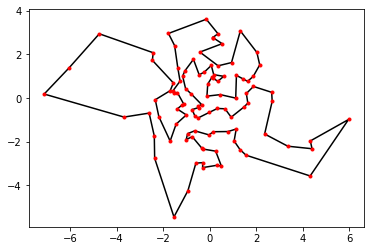

In [ ]:
import satx
import numpy as np
import matplotlib.pyplot as plt

n = 100
data = np.random.logistic(size=(n, 2))
seq = satx.hess_sequence(n, oracle=lambda seq: sum(np.linalg.norm(data[seq[i - 1]] - data[seq[i]]) for i in range(n)), fast=False)
x, y = zip(*[data[i] for i in seq + [seq[0]]])
plt.plot(x, y, 'k-')
plt.plot(x, y, 'r.')
plt.show()

45 [1, 6, 9, 5, 4, 3, 7, 0, 2, 8] [3, 3, 5, 2, 5, 9, 4, 5, 6, 3]


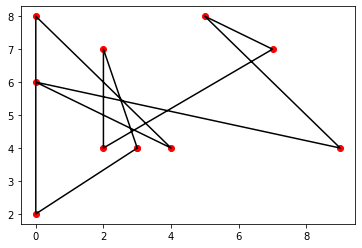

43 [8, 9, 2, 1, 3, 7, 6, 5, 4, 0] [2, 4, 5, 6, 9, 2, 5, 2, 4, 4]


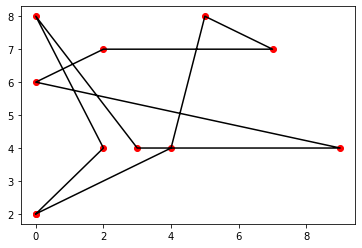

42 [5, 6, 2, 3, 7, 8, 0, 1, 9, 4] [5, 2, 9, 9, 4, 4, 1, 1, 5, 2]


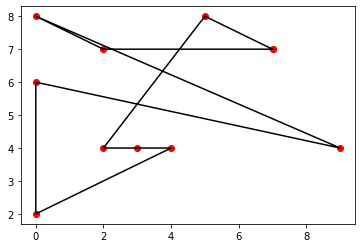

40 [2, 4, 0, 8, 3, 5, 6, 7, 1, 9] [5, 4, 4, 9, 3, 5, 2, 3, 1, 4]


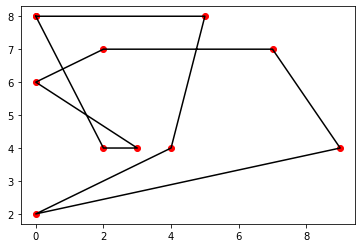

36 [9, 2, 6, 8, 1, 4, 3, 5, 0, 7] [4, 2, 5, 3, 4, 5, 3, 4, 4, 2]


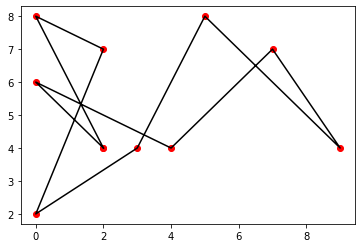

32 [7, 6, 1, 3, 5, 4, 0, 8, 9, 2] [2, 3, 6, 3, 2, 4, 4, 2, 4, 2]


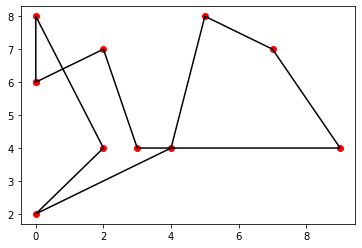

31 [5, 3, 4, 1, 6, 2, 7, 8, 9, 0] [3, 5, 4, 3, 2, 2, 4, 2, 2, 4]


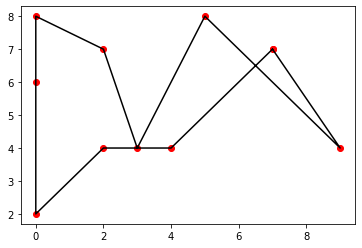

27 [6, 2, 7, 8, 9, 1, 0, 5, 3, 4] [2, 2, 4, 2, 1, 1, 4, 3, 5, 3]


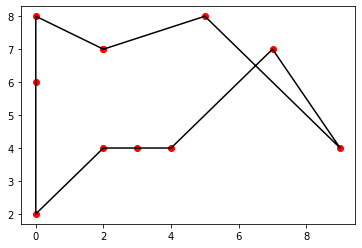

25 [4, 6, 2, 7, 8, 9, 1, 0, 3, 5] [3, 2, 2, 4, 2, 1, 1, 5, 3, 2]


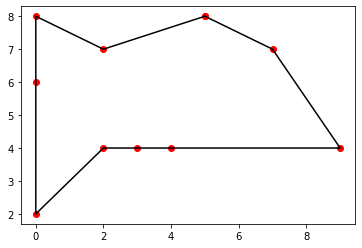

In [ ]:
import numpy as np
import satx
import matplotlib.pyplot as plt


n = 10

data = np.random.randint(0, 10, size=(n, 2))
matrix = np.zeros(shape=(n, n))
for i in range(n):
    for j in range(n):
        matrix[i][j] = int(np.linalg.norm(data[i] - data[j]))

opt = satx.oo() - 1
while True:
    satx.engine(int(sum(matrix.flatten())).bit_length() + 1, cnf_path='tmp.cnf')
    x, y = satx.matrix_permutation(matrix.flatten(), n)
    assert sum(y) < opt
    if satx.satisfy('slime'):
        opt = sum(y)
        print(opt, x, y)

        a, b = zip(*[data[i.value] for i in x + [x[0]]])
        plt.plot(a, b, 'ro')
        plt.plot(a, b, 'k-')
        plt.show('tsp.png')
        plt.close()

        satx.clear(x)
        satx.clear(y)
    else:
        break

# MAGIC SQUARE


In recreational mathematics and combinatorial design, a magic square is a $n\times n$ square grid (where n is the number of cells on each side) filled with distinct positive integers in the range 
${1,2,...,n^{2}}$ such that each cell contains a different integer and the sum of the integers in each row, column and diagonal is equal.

https://en.wikipedia.org/wiki/Magic_square

In [ ]:
import satx
import numpy as np

n = 3

satx.engine(5, cnf_path='tmp.cnf')

c = satx.integer()

xs = satx.matrix(dimensions=(n, n))

satx.apply_single(satx.flatten(xs), lambda x: x > 0)
satx.all_different(satx.flatten(xs))

for i in range(n):
    assert sum(xs[i][j] for j in range(n)) == c
for j in range(n):
    assert sum(xs[i][j] for i in range(n)) == c

assert sum(xs[i][i] for i in range(n)) == c
assert sum(xs[i][n - 1 - i] for i in range(n)) == c

if satx.satisfy('slime'):
    print(c)
    print(np.vectorize(int)(xs))
else:
    print('Infeasible ...')

18
[[ 7  9  2]
 [ 1  6 11]
 [10  3  5]]


# SCHUR TRIPLES PROBLEM:

Input: list of 3N distinct positive integers

Question: Is there a partition of the list into N triples $(a_i, b_i, c_i)$ such that $a_i+b_i=c_i$

The condition that all numbers must be distinct makes the problem very interesting and McDiarmid calls it a surprisingly troublesome.

https://cstheory.stackexchange.com/questions/16253/list-of-strongly-np-hard-problems-with-numerical-data

In [ ]:
import satx
import numpy as np

bits = 7
size = 3 * 10
triplets = []
while len(triplets) < size:
    a = np.random.randint(1, 2 ** bits)
    b = np.random.randint(1, 2 ** bits)
    if a != b and a not in triplets and b not in triplets and a + b not in triplets:
        triplets += [a, b, a + b]
triplets.sort()
print(triplets)
satx.engine(bits=max(triplets).bit_length(), cnf_path='tmp.cnf')
xs, ys = satx.permutations(triplets, size)
for i in range(0, size, 3):
    assert ys[i] + ys[i + 1] == ys[i + 2]
if satx.satisfy('slime'):
    for i in range(0, size, 3):
        print('{} == {} + {}'.format(ys[i + 2], ys[i], ys[i + 1]))
else:
    print('Infeasible ...')

[2, 7, 22, 24, 26, 27, 29, 34, 48, 56, 62, 66, 75, 76, 77, 81, 85, 92, 98, 100, 102, 110, 120, 124, 139, 141, 168, 176, 191, 194]
194 == 102 + 92
176 == 100 + 76
141 == 66 + 75
34 == 27 + 7
191 == 81 + 110
85 == 29 + 56
124 == 26 + 98
24 == 2 + 22
168 == 120 + 48
139 == 77 + 62


# SUBSET SUM PROBLEM

In this problem, there is a given set with some integer elements. And another some value is also provided, we have to find a subset of the given set whose sum is the same as the given sum value.

https://en.wikipedia.org/wiki/Subset_sum_problem

In [ ]:
import satx
import numpy as np

universe = np.random.randint(1, 1000, size=32)
t = np.random.randint(min(universe), sum(universe))

print(t, universe)

satx.engine(t.bit_length(), cnf_path='tmp.cnf')

bits, subset = satx.subsets(universe)

assert sum(subset) == t

if satx.satisfy('slime'):
    solution = [universe[i] for i in range(len(universe)) if bits.binary[i]]
    print(sum(solution), solution)
else:
    print('Infeasible ...')

5790 [664 618 265  17 752 664 700 768  42 576 715 121 662 634 230 729  29 244
 397  45 159 783 106 516  20 384 313 393 582  51 168 529]
5790 [265, 664, 700, 42, 576, 715, 634, 729, 397, 159, 516, 393]


# PERMUTATION RECONSTRUCTION FROM DIFFERENCES

https://arxiv.org/pdf/1410.6396.pdf

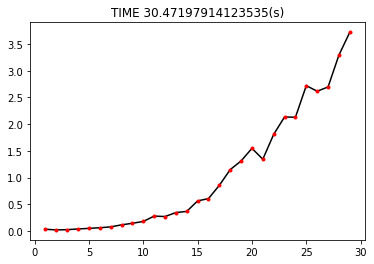

In [ ]:
import satx
import numpy as np
import matplotlib.pyplot as plt

def gen_instance(n):
    import random
    y = list(range(1, n + 1))
    random.shuffle(y)
    return [abs(y[i + 1] - y[i]) for i in range(n - 1)]


import time
start = time.time()
times = []
sizes = []
for n in range(1, 30):
    diffs = gen_instance(n)
    ini = time.time()
    satx.engine(n.bit_length() + 1, cnf_path='tmp.cnf')
    x = satx.vector(size=n)
    satx.all_different(x)
    satx.apply_single(x, lambda a: 1 <= a <= n)
    for i in range(n - 1):
        assert satx.index(i, diffs) == satx.one_of([x[i + 1] - x[i], x[i] - x[i + 1]])
    if satx.satisfy('slime'):
        end = time.time() - ini
        xx = [abs(x[i + 1] - x[i]) for i in range(n - 1)]
        if xx == diffs:
            sizes.append(n)
            times.append(end)
        else:
            raise Exception('Error!')
    else:
        raise Exception('Error!')
end = time.time() - start
plt.title('TIME {}(s)'.format(end))
plt.plot(sizes, times, 'k-')
plt.plot(sizes, times, 'r.')
plt.show()
plt.close()

# HAMILTONIAN CYCLE PROBLEM

In the mathematical field of graph theory, a Hamiltonian path (or traceable path) is a path in an undirected or directed graph that visits each vertex exactly once. A Hamiltonian cycle (or Hamiltonian circuit) is a Hamiltonian path that is a cycle. Determining whether such paths and cycles exist in graphs is the Hamiltonian path problem, which is NP-complete.

https://en.wikipedia.org/wiki/Hamiltonian_path

In [ ]:
import sys

import satx
import numpy as np


n = 10
M = np.random.randint(0, 2, size=(n, n))

print(M)

satx.engine((n ** 2).bit_length(), cnf_path='tmp.cnf')
ids, elements = satx.matrix_permutation((1 - M).flatten(), n)

assert sum(elements) == 0

if satx.satisfy('slime'):
    for i in ids:
        for j in ids:
            sys.stdout.write('{} '.format(M[i.value][j.value]))
        sys.stdout.write('\n') 
    sys.stdout.write('\n')
else:
    print('Infeasible ...')

[[0 0 1 0 0 1 0 0 0 1]
 [0 0 1 1 0 1 1 0 1 1]
 [1 1 1 1 1 1 0 0 0 0]
 [1 1 1 1 0 1 1 1 1 0]
 [0 1 1 1 1 0 1 0 1 0]
 [0 0 0 1 1 1 0 1 1 0]
 [0 0 0 1 1 0 0 1 0 1]
 [0 1 0 1 0 0 0 0 1 1]
 [0 1 1 0 1 1 0 1 1 1]
 [1 1 0 0 0 0 1 1 0 1]]
0 1 0 0 1 0 0 1 1 0 
1 1 1 1 0 1 1 1 0 1 
0 0 0 1 0 0 1 0 1 0 
0 1 1 1 1 0 1 0 0 1 
1 1 0 1 1 1 0 0 0 1 
0 0 0 1 1 1 1 1 1 1 
0 1 0 0 1 1 1 1 0 0 
0 1 0 0 0 1 0 0 1 1 
1 0 1 0 0 0 0 1 1 1 
1 1 0 1 0 1 1 0 1 0 



# BIN PACKING PROBLEM

In the bin packing problem, items of different volumes must be packed into a finite number of bins or containers each of a fixed given volume in a way that minimizes the number of bins used. In computational complexity theory, it is a combinatorial NP-hard problem. The decision problem (deciding if items will fit into a specified number of bins) is NP-complete.

https://en.wikipedia.org/wiki/Bin_packing_problem

In [ ]:
import satx
import numpy as np

capacity = 50
size = 50
elements = sorted([np.random.randint(1, capacity // 2 - 1) for _ in range(size)], reverse=True)
print(capacity)
print(elements)
bins = int(np.ceil(sum(elements) / capacity))
while True:
    satx.engine(bits=capacity.bit_length() + 1, cnf_path='tmp.cnf')
    slots = satx.vector(bits=len(elements), size=bins)
    for i in range(len(elements)):
        assert sum(satx.switch(slot, i) for slot in slots) == 1
    for slot in slots:
        assert sum(satx.switch(slot, i) * elements[i] for i in range(len(elements))) <= capacity
    if satx.satisfy('slime'):
        print('Solution for {} bins...'.format(bins))
        for slot in slots:
            print(''.join(['_' if boolean else '#' for boolean in slot.binary]))
        for slot in slots:
            sub = [item for i, item in enumerate(elements) if not slot.binary[i]]
            print(sum(sub), sub)
        break
    else:
        print('No solution for {} bins...'.format(bins))
        bins += 1

50
[23, 23, 20, 20, 20, 19, 19, 18, 18, 18, 18, 17, 17, 17, 17, 16, 16, 16, 16, 16, 15, 15, 15, 15, 14, 14, 13, 13, 12, 12, 10, 10, 9, 9, 9, 8, 6, 6, 5, 5, 5, 4, 4, 4, 2, 2, 2, 2, 1, 1]
Solution for 13 bins...
_________#____#_____#_____________________________
_______________#_#_#______________________________
_#_#______________________________________________
_____________#______________##___#________________
______##__________________#_______________________
____________#___________________#_______#____#____
________#_________#_____#_________________________
__________#________________#__#___#_______________
_______________________#____________###___##____#_
#_______________#______________________#______##__
__#_#______________________________#______________
_____#___________________#_____#_________#__#____#
___________#_________##___________________________
50 [18, 17, 15]
48 [16, 16, 16]
43 [23, 20]
50 [17, 12, 12, 9]
50 [19, 18, 13]
33 [17, 9, 5, 2]
48 [18, 16, 14]
50 [18, 13, 10,

# ZERO-ONE INTEGER PROGRAMMING DEFINITION

Zero-one integer programming (which can also be written as 0-1 integer programming) is a mathematical method of using a series of binary, yes (1) and no (0) answers to arrive at a solution when there are two mutually exclusive options.

https://en.wikipedia.org/wiki/Integer_programming

In [ ]:
import satx
import numpy as np

n, m = 10, 5
cc = np.random.randint(0, 1000, size=(n, m))
d = np.dot(cc, np.random.randint(0, 2, size=(m,)))
print(cc)
print(d)
satx.engine(bits=int(np.sum(cc)).bit_length(), cnf_path='tmp.cnf')
xs = satx.vector(size=m)
satx.all_binaries(xs)
assert (np.dot(cc, xs) == d).all()
if satx.satisfy('slime'):
    print(xs)
    print('Proof:')
    print(np.dot(cc, xs))
else:
    print('Infeasible...')

[[645 928 346 970 143]
 [497 344 180 168 949]
 [587 918 512 895 966]
 [  6 804 691 608 399]
 [831 654 275 651 469]
 [181  98 232 938 547]
 [369 242 578 467 492]
 [160 368   6 106 803]
 [627 417 655 884  29]
 [817 162 936 469 434]]
[ 489 1129 1478 1090  744  779 1070  809  684 1370]
[0, 0, 1, 0, 1]
Proof:
[489 1129 1478 1090 744 779 1070 809 684 1370]


# n-QUEENS COMPLETION PROBLEM

The n- Queens Completion problem is a variant, dating to 1850, in which some queens are already placed and the solver is asked to place the rest, if possi- ble. ... The n-Queens problem is to place n chess queens on an n by n chessboard so that no two queens are on the same row, column or diagonal.

https://www.ijcai.org/Proceedings/2018/0794.pdf

In [ ]:
import satx


def completion(n, m, seed):
    import random
    """
    http://www.csplib.org/Problems/prob079/data/queens-gen-fast.py.html
    """
    random.seed(seed)

    d1 = [0 for _ in range(2 * n - 1)]
    d2 = [0 for _ in range(2 * n - 1)]

    valid_rows = [i for i in range(n)]
    valid_cols = [j for j in range(n)]

    def no_attack(r, c):
        return d1[r + c] == 0 and d2[r - c + n - 1] == 0

    pc = []
    queens_left = n

    for attempt in range(n * n):
        i = random.randrange(queens_left)
        j = random.randrange(queens_left)
        r = valid_rows[i]
        c = valid_cols[j]
        if no_attack(r, c):
            pc.append([r, c])
            d1[r + c] = 1
            d2[r - c + n - 1] = 1
            valid_rows[i] = valid_rows[queens_left - 1]
            valid_cols[j] = valid_cols[queens_left - 1]
            queens_left -= 1
            if len(pc) == m:
                return [[x + 1, y + 1] for x, y in pc]

def show(pc):
    table = ''
    for i in range(1, n + 1):
        table += ''
        for j in range(1, n + 1):
            if [i, j] not in pc:
                table += '. '
            else:
                table += 'Q '
        table += '\n'
    print(table)
    print('# seed = {}'.format(seed))
    
n, m, seed = 30, 15, 0
placed_queens = completion(n, m, seed)
show(placed_queens)
satx.engine(bits=n.bit_length() + 1, cnf_path='tmp.cnf')
qs = satx.vector(size=n)
for (a, b) in placed_queens:
    assert qs[a - 1] == b - 1
satx.apply_single(qs, lambda x: x < n)
satx.apply_dual(qs, lambda x, y: x != y)
satx.apply_dual([qs[i] + i for i in range(n)], lambda x, y: x != y)
satx.apply_dual([qs[i] - i for i in range(n)], lambda x, y: x != y)
if satx.satisfy('slime'):
    for i in range(n):
        print(''.join(['Q ' if qs[i] == j else '. ' for j in range(n)]))
    print('')
else:
    print('Infeasible ...')

. . . . . . . . . . . . . . . . . . . . . . . . . . . . . . 
. . . . . . . . . . . . . . . . . . . . . . . . . . . . . . 
. . . . . . . . . . . . . . . . . . . . . . . . . . . . . . 
. . Q . . . . . . . . . . . . . . . . . . . . . . . . . . . 
. . . . . . . . . Q . . . . . . . . . . . . . . . . . . . . 
. . . . . . . . . . . . . . . . . . . . . . . . . . . . . . 
. . . . . . . . . . . . . . . . . . . . . . . . . . Q . . . 
. . . . . . . . . . . . . . . . . . . . . . . . . . . . . . 
. . . . . . . . . . . . . . . . Q . . . . . . . . . . . . . 
. . . . . . . . . . . . . . . . . . . . . . . . . . . . . . 
. . . . . . . . . . . . . . . . . . . . . . . . . . . . . . 
. . . . . . . . . . . . . . . . . . Q . . . . . . . . . . . 
. . . . . . . . . . . . . . . . . . . . . . . . . . . . . . 
. Q . . . . . . . . . . . . . . . . . . . . . . . . . . . . 
. . . . . . . . . . . . . . . . . . . . . . . . . . . . . . 
. . . . . . . . . . . . . . . . . . . . . . . . . . . . . Q 
. . . . . . . . . . . . 

# PARTITION PROBLEM

n number theory and computer science, the partition problem, or number partitioning, is the task of deciding whether a given multiset $S$ of positive integers can be partitioned into two subsets $S_1$ and $S_2$ such that the sum of the numbers in $S_1$ equals the sum of the numbers in $S_2$.

https://en.wikipedia.org/wiki/Partition_problem

In [ ]:
import numpy as np
import satx

size = 20

data = np.random.randint(1000, size=size)

print(data)

satx.engine(int(sum(data)).bit_length(), cnf_path='tmp.cnf')

T, sub, com = satx.subsets(data, complement=True)

assert sum(sub) == sum(com)

if satx.satisfy('slime'):
    sub_ = [data[i] for i in range(size) if T.binary[i]]
    com_ = [data[i] for i in range(size) if not T.binary[i]]
    print(sum(sub_), sub_)
    print(sum(com_), com_)
else:
    print('Infeasible ...')

[367 909 860 217 562 205 337  43 633 679 965 528 789 709 448 502 209 775
 713 650]
5550 [367, 217, 562, 337, 965, 528, 709, 502, 713, 650]
5550 [909, 860, 205, 43, 633, 679, 789, 448, 209, 775]


# SUDOKU 

is a logic-based, combinatorial number-placement puzzle. The objective is to fill a 9×9 grid with digits so that each column, each row, and each of the nine 3×3 subgrids that compose the grid (also called "boxes", "blocks", or "regions") contain all of the digits from 1 to 9. The puzzle setter provides a partially completed grid, which for a well-posed puzzle has a single solution.

Completed games are always an example of a Latin square which include an additional constraint on the contents of individual regions. For example, the same single integer may not appear twice in the same row, column, or any of the nine 3×3 subregions of the 9×9 playing board.

https://en.wikipedia.org/wiki/Sudoku

In [ ]:
import numpy as np
import satx


def expand_line(line):
    return line[0] + line[5:9].join([line[1:5] * (base - 1)] * base) + line[9:13]


def show(board):
    import string
    line0 = expand_line('╔═══╤═══╦═══╗')
    line1 = expand_line('║ . │ . ║ . ║')
    line2 = expand_line('╟───┼───╫───╢')
    line3 = expand_line('╠═══╪═══╬═══╣')
    line4 = expand_line('╚═══╧═══╩═══╝')

    symbol = ' ' + string.printable.replace(' ', '')
    nums = [[''] + [symbol[n] for n in row] for row in board]
    print(line0)
    for r in range(1, side + 1):
        print("".join(n + s for n, s in zip(nums[r - 1], line1.split('.'))))
        print([line2, line3, line4][(r % side == 0) + (r % base == 0)])


def generate(base):
    # pattern for a baseline valid solution
    def pattern(r, c):
        return (base * (r % base) + r // base + c) % side

    # randomize rows, columns and numbers (of valid base pattern)
    from random import sample

    def shuffle(s):
        return sample(s, len(s))

    rBase = range(base)
    rows = [g * base + r for g in shuffle(rBase) for r in shuffle(rBase)]
    cols = [g * base + c for g in shuffle(rBase) for c in shuffle(rBase)]
    nums = shuffle(range(1, base * base + 1))

    # produce board using randomized baseline pattern
    board = [[nums[pattern(r, c)] for c in cols] for r in rows]

    squares = side * side
    empties = (squares * 3) // 4
    for p in map(int, sample(range(squares), empties)):
        board[p // side][p % side] = 0

    show(board)
    return board


base = 4
side = base * base

puzzle = np.asarray(generate(base))

satx.engine(side.bit_length(), cnf_path='tmp.cnf')

board = np.asarray(satx.matrix(dimensions=(side, side)))
satx.apply_single(board.flatten(), lambda x: 1 <= x <= side)

for i in range(side):
    for j in range(side):
        if puzzle[i][j]:
            assert board[i][j] == puzzle[i][j]

for c, r in zip(board, board.T):
    satx.all_different(c)
    satx.all_different(r)

for i in range(base):
    for j in range(base):
        satx.all_different(board[i * base:(i + 1) * base, j * base:(j + 1) * base].flatten())

if satx.satisfy('slime'):
    show(np.vectorize(int)(board))


╔═══╤═══╤═══╤═══╦═══╤═══╤═══╤═══╦═══╤═══╤═══╤═══╦═══╤═══╤═══╤═══╗
║   │   │   │ 4 ║   │   │ 8 │   ║   │   │   │   ║   │ b │ f │   ║
╟───┼───┼───┼───╫───┼───┼───┼───╫───┼───┼───┼───╫───┼───┼───┼───╢
║   │ 3 │   │   ║   │   │   │   ║ f │   │   │   ║   │   │   │   ║
╟───┼───┼───┼───╫───┼───┼───┼───╫───┼───┼───┼───╫───┼───┼───┼───╢
║   │   │ 5 │ e ║ 7 │   │   │   ║ 4 │   │   │ 1 ║ 3 │   │ 8 │   ║
╟───┼───┼───┼───╫───┼───┼───┼───╫───┼───┼───┼───╫───┼───┼───┼───╢
║   │   │   │   ║ 0 │   │   │   ║   │   │   │ 3 ║   │   │ e │   ║
╠═══╪═══╪═══╪═══╬═══╪═══╪═══╪═══╬═══╪═══╪═══╪═══╬═══╪═══╪═══╪═══╣
║   │   │   │   ║   │   │ 2 │   ║ a │   │   │   ║   │   │   │ 9 ║
╟───┼───┼───┼───╫───┼───┼───┼───╫───┼───┼───┼───╫───┼───┼───┼───╢
║ 3 │   │   │   ║   │   │   │   ║   │ e │   │   ║   │ f │   │   ║
╟───┼───┼───┼───╫───┼───┼───┼───╫───┼───┼───┼───╫───┼───┼───┼───╢
║   │   │   │ a ║   │   │   │   ║ 0 │   │   │   ║   │   │   │   ║
╟───┼───┼───┼───╫───┼───┼───┼───╫───┼───┼───┼───╫───┼───┼───┼───╢
║   │ b │ 

# MAXIMUM CONSTRAINED PARTITITON

---



---



http://www.csc.kth.se/~viggo/wwwcompendium/node152.html

In [ ]:
import random

import satx

bits = 10
n = 2 * 100

D = [random.randint(1, 2 ** bits) for _ in range(n)]

print('D   : {}'.format(D))

satx.engine(sum(D).bit_length(), cnf_path='tmp.cnf')

bins, sub, com = satx.subsets(D, n // 2, complement=True)

assert sum(sub) == sum(com)

if satx.satisfy('slime'):
    sub = [D[i] for i in range(n) if bins.binary[i]]
    com = [D[i] for i in range(n) if not bins.binary[i]]
    print(sum(sub), len(sub), sub)
    print(sum(com), len(com), com)
    print('\n')
else:
    print('Infeasible ...')

D   : [316, 705, 499, 383, 693, 1023, 469, 226, 787, 797, 952, 946, 452, 818, 638, 997, 477, 645, 4, 189, 967, 650, 808, 466, 884, 100, 83, 833, 192, 540, 411, 670, 366, 232, 371, 746, 58, 479, 90, 17, 784, 10, 266, 239, 409, 168, 955, 405, 4, 851, 137, 363, 480, 465, 851, 783, 973, 1, 893, 431, 781, 85, 552, 59, 711, 753, 691, 930, 276, 189, 516, 212, 212, 559, 50, 291, 279, 777, 425, 655, 413, 863, 247, 217, 973, 256, 917, 963, 366, 932, 696, 264, 853, 522, 773, 161, 688, 479, 930, 509, 719, 985, 841, 49, 916, 13, 830, 914, 459, 880, 494, 519, 978, 973, 289, 468, 903, 581, 738, 996, 305, 180, 385, 615, 252, 121, 318, 703, 76, 685, 329, 960, 800, 385, 843, 1017, 394, 344, 801, 97, 695, 385, 672, 376, 889, 312, 1011, 437, 904, 68, 498, 999, 651, 403, 2, 90, 128, 275, 498, 908, 459, 224, 872, 587, 693, 1011, 394, 335, 764, 731, 898, 801, 899, 651, 960, 138, 301, 451, 233, 320, 808, 951, 431, 754, 96, 44, 832, 425, 180, 845, 843, 432, 9, 280, 1003, 633, 779, 136, 161, 1010]
53601 100 [49

# PARALLEL OPTIMIZATION - MIN-MAX SUM SUBSET CARDINALITY

# GRIEWANK FUNCTION

Ref: https://www.sfu.ca/~ssurjano/griewank.html

In [ ]:
import numpy
import satx


class GriewankFunctionHESS:

    def __init__(self, a, b):
        self.a = a
        self.b = b

    def oracle(self, xs):
        return numpy.sum([(x ** 2) / 4000 for x in xs]) - numpy.prod([numpy.cos(x / numpy.sqrt(i + 1)) for i, x in enumerate(xs)]) + 1

    def f(self, i, j, xs):
        xs[i], xs[j] = self.a + xs[i] / self.b, self.a + xs[j] / self.b
        xs[i:j] = xs[i:j][::-1]

    def g(self, i, j, xs):
        xs[i:j] = xs[i:j][::-1]
        xs[i], xs[j] = self.b * xs[i] - self.a, self.b * xs[j] - self.a

    def log(self, top, opt):
        print(top)

    def run(self, n):
        xs = numpy.random.randint(-600, 600, size=n)
        return satx.hess_abstract(xs, self.oracle, self.f, self.g, self.log, target=0)


n = 100
gf = GriewankFunctionHESS(n ** -2, n ** 2)
print(gf.run(n))

3088.4747500000003
3087.3857500000004
3077.6835
3060.6532500000003
3054.333
2976.492
2964.392
2932.5297499999997
2919.4195
2919.3835
2916.19125
2828.279
2780.53675
2751.97575
2691.95075
2681.95075
2657.3017500000005
2647.1007500000005
2637.7885000000006
2572.7635
2545.2075000000004
2541.2385000000004
2502.23225
2468.56
2397.53775
2378.9055
2378.8804999999998
2364.4804999999997
2283.2555
2272.4395
2244.7172499999997
2165.75625
2154.8360000000002
2152.67375
2152.66975
2145.44475
2144.48375
2097.1775000000002
2034.42725
1996.985
1963.4959999999999
1949.21575
1945.5554999999997
1873.7314999999996
1865.5412499999998
1827.9052499999998
1795.5052499999997
1706.4029999999998
1636.9707499999997
1582.2147499999999
1553.65375
1552.5314999999998
1532.5092499999998
1491.3002499999998
1464.894
1377.5737499999998
1377.5647499999998
1340.7007499999997
1334.4597500000004
1302.4187499999987
1255.3297499999978
1247.0487500000047
1193.6877499999462
1189.9055000000567
1174.7765000000916
1168.535500000111
1